# Unsupervised learning Revision

In [61]:
#imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, adjusted_rand_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

Adjusted Rand Index:  0.645147003482001
Silhouette Score:  0.45542721937148334


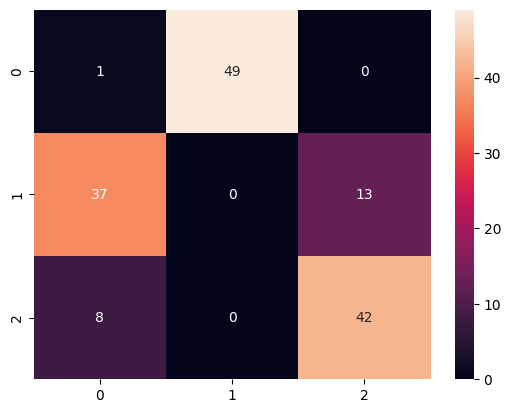

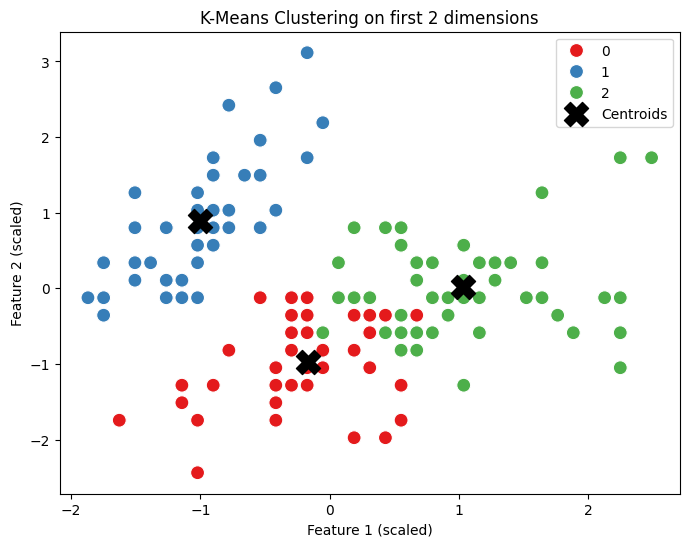

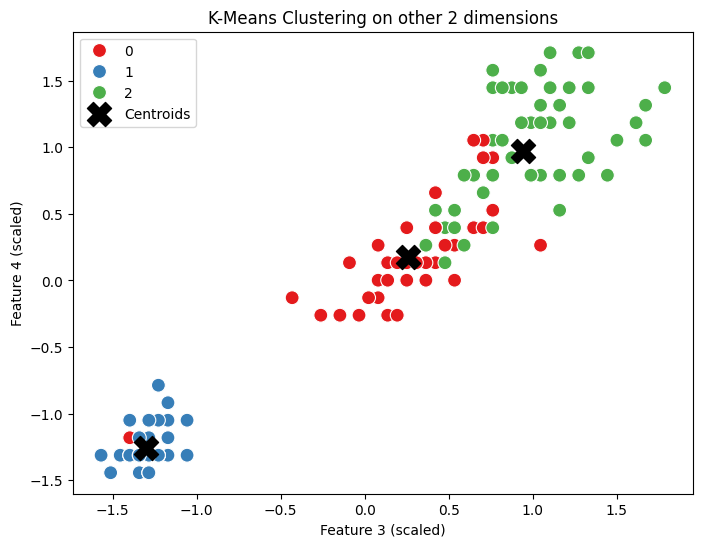

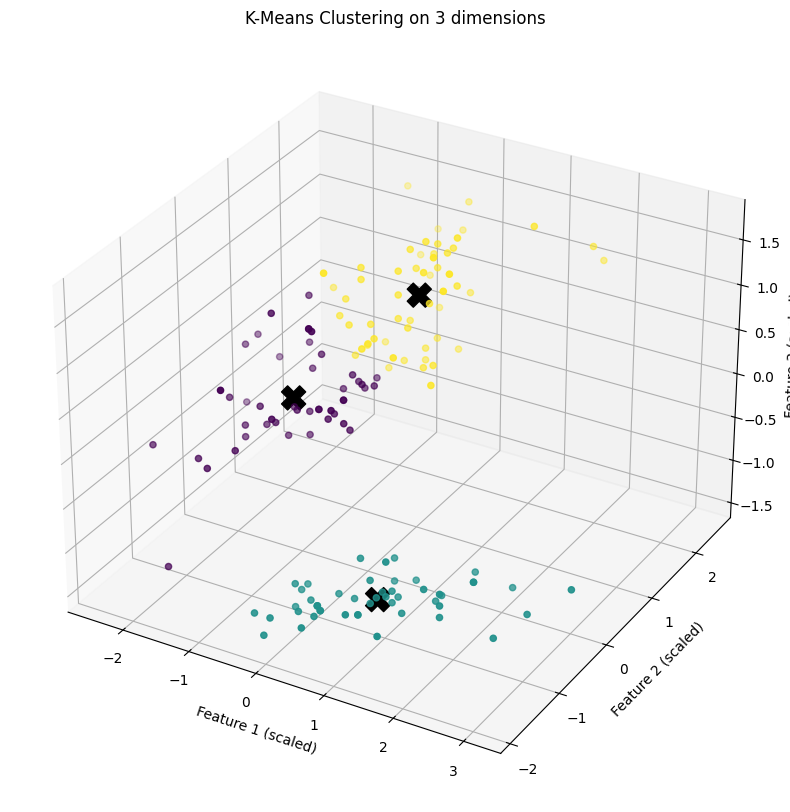

In [ ]:
#Kmeans Clustering

df=pd.read_csv("D:\\AppStoneLab\\Day-wise\\Day 2\\Iris.csv")

df.drop('Id', axis=1, inplace=True)

X=df.drop('Species', axis=1)
y=df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

X=StandardScaler().fit_transform(X)
kmeans=KMeans(n_clusters=3, init='k-means++',random_state=100)
kmeans.fit(X)
y_pred=kmeans.predict(X)

ars=adjusted_rand_score(y, y_pred)
print("Adjusted Rand Index: ", ars)

sil=silhouette_score(X, y_pred)
print("Silhouette Score: ", sil)

cm=confusion_matrix(y, y_pred)
sns.heatmap(cm, annot=True)
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=y_pred, palette='Set1', s=100)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='black', marker='X', label='Centroids')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('K-Means Clustering on first 2 dimensions')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,2], y=X[:,3], hue=y_pred, palette='Set1', s=100)
plt.scatter(kmeans.cluster_centers_[:,2], kmeans.cluster_centers_[:,3], s=300, c='black', marker='X', label='Centroids')
plt.xlabel('Feature 3 (scaled)')
plt.ylabel('Feature 4 (scaled)')
plt.title('K-Means Clustering on other 2 dimensions')
plt.legend()
plt.show()

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(projection='3d')
ax.scatter(X[:,1], X[:,0], X[:,3], c=y_pred, cmap='viridis')
ax.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,3], s=300, c='black', marker='X', label='Centroids', alpha=1)
ax.set_xlabel('Feature 1 (scaled)')
ax.set_ylabel('Feature 2 (scaled)')
ax.set_zlabel('Feature 3 (scaled)')
ax.set_title('K-Means Clustering on 3 dimensions')
plt.show()

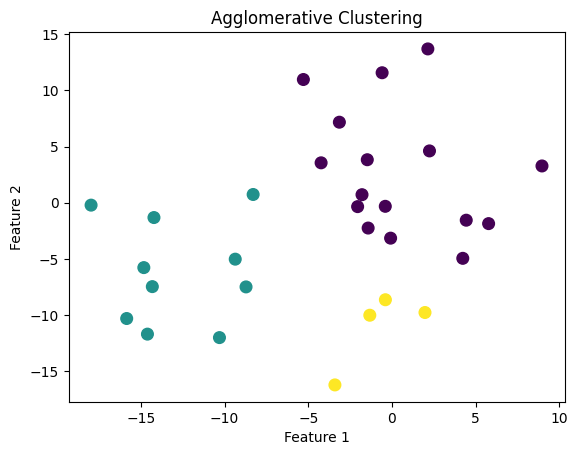

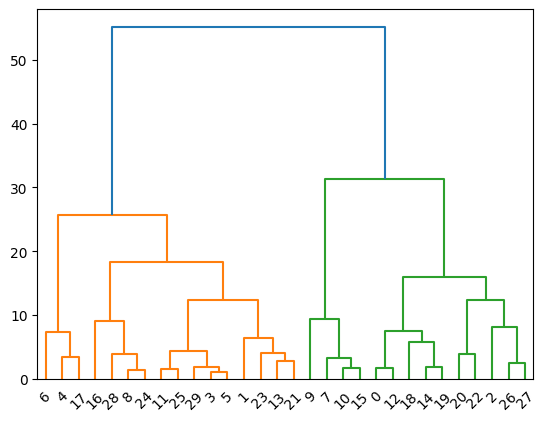

[[3, 5], [8, 24], [11, 25], [10, 15], [0, 12], [29, 30], [14, 19], [26, 27], [13, 21], [7, 33], [4, 17], [28, 31], [20, 22], [23, 38], [32, 35], [18, 36], [1, 43], [6, 40], [34, 45], [2, 37], [16, 41], [9, 39], [42, 49], [44, 46], [48, 52], [50, 53], [47, 55], [51, 54], [56, 57]]
Silhouette Score:  0.40658968765272535


In [ ]:
#Hierarchical clustering

X, _ = make_blobs(n_samples=30, centers=3, cluster_std=5, n_features=2, random_state=100)

hc=AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward", compute_distances=True)
hc.fit(X)
labels=hc.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=70)
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Z=linkage(X, method='ward')
dendrogram(Z, p=5)
plt.show()

print(hc.children_.tolist())

sil=silhouette_score(X, labels)
print("Silhouette Score: ", sil)


Adjusted Rand Index:  0.4282634768714612
Silhouette Score:  0.3491981656526392


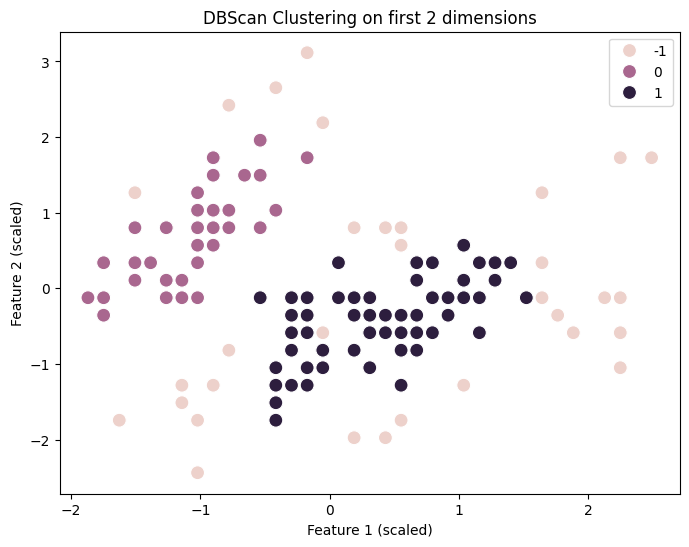

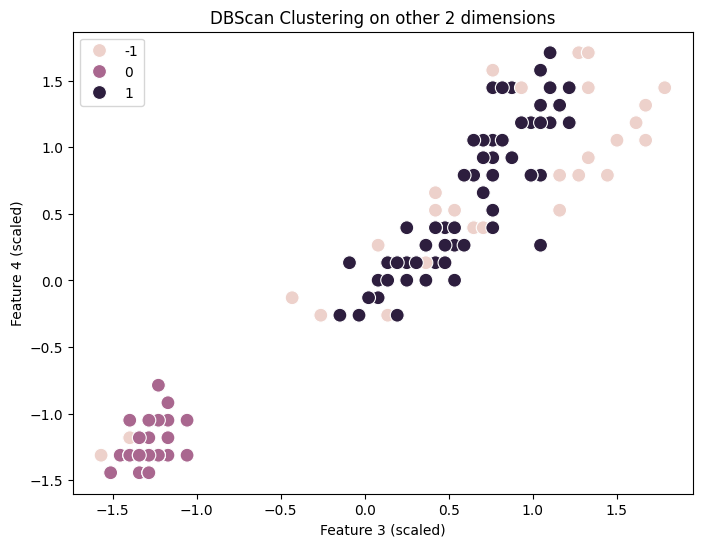

In [ ]:
# DBScan clustering

df=pd.read_csv("D:\\AppStoneLab\\Day-wise\\Day 2\\Iris.csv")

df.drop('Id', axis=1, inplace=True)

X=df.drop('Species', axis=1)
y=df['Species'].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

X=StandardScaler().fit_transform(X)

dbs=DBSCAN(eps=0.5, metric='euclidean', algorithm='auto')
dbs.fit(X)

labels=dbs.labels_

ars=adjusted_rand_score(y, labels)
print("Adjusted Rand Index: ", ars)

sil=silhouette_score(X, labels)
print("Silhouette Score: ", sil)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,0], y=X[:,1], hue=labels, s=100)
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.title('DBScan Clustering on first 2 dimensions')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=X[:,2], y=X[:,3], hue=labels, s=100)
plt.xlabel('Feature 3 (scaled)')
plt.ylabel('Feature 4 (scaled)')
plt.title('DBScan Clustering on other 2 dimensions')
plt.legend()
plt.show()